# 1. Descriptive statisics

## 1.1. Basic statistics

In [1]:
import numpy as np

In [2]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

In [3]:
sample.min()

109

In [4]:
sample.max()

996

The [mean](https://en.wikipedia.org/wiki/Arithmetic_mean) (denoted $\mu$) or the [expected value](https://en.wikipedia.org/wiki/Expected_value) (denoted $E[\mathbf{x}]$) of a variable $\mathbf{x}=(x_1,x_2,\dots, x_n)$ is calculated by the formula:

$$\mu = \frac{1}{n} \sum_{i=1}^{n}{x_i}$$

In [5]:
sample.sum()

57069

In [6]:
sample.mean()

570.69

## 1.2. Variance
The [variance](https://en.wikipedia.org/wiki/Variance) of a random variable $\mathbf{x}$ is defined as:
$$\sigma^2 = \frac{1}{n}\sum_{i=1}^n{(x_i - \mu)}^2$$
where:
- $\sigma$ is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of $\mathbf{x}$
- $\sigma^2$ is the variance of $\mathbf{x}$
- $\mu$ is the mean of $\mathbf{x}$
- $n$ is the size of $\mathbf{x}$
- $x_i$ is the observation number $i$

In [7]:
import numpy as np

In [8]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

In [9]:
# standard deviation
sample.std()

270.7422647094465

In [10]:
# variance
sample.var()

73301.37389999999

#### Unbiased variance
In many practical situations, $\mathbf{x}$ is just a sample and the true variance of the whole population is unknown. $\sigma_{\mathbf{x}}^2$ in this case is an [biased estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator), it usually underestimates the population variance. Correting for this bias yields:

$$\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^n{(x_i - \mu)}^2$$

The use of the term $n-1$ is under [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The quantity $1$ subtracted from $n$ is the [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)).

In [3]:
sample.var(ddof=1)

74041.79181818181

#### Variance and mean
The following formula demonstrates the relationship between the mean and the variance:

$$\sigma^2 = E\left[(\mathbf{x} - E[\mathbf{x}])^2\right] = E[\mathbf{x}^2] - E[\mathbf{x}]^2$$

In [11]:
np.mean(sample**2) - np.mean(sample)**2

73301.37389999995

#### Visualization of variance
Standard deviation and variance show how spread out numbers are.

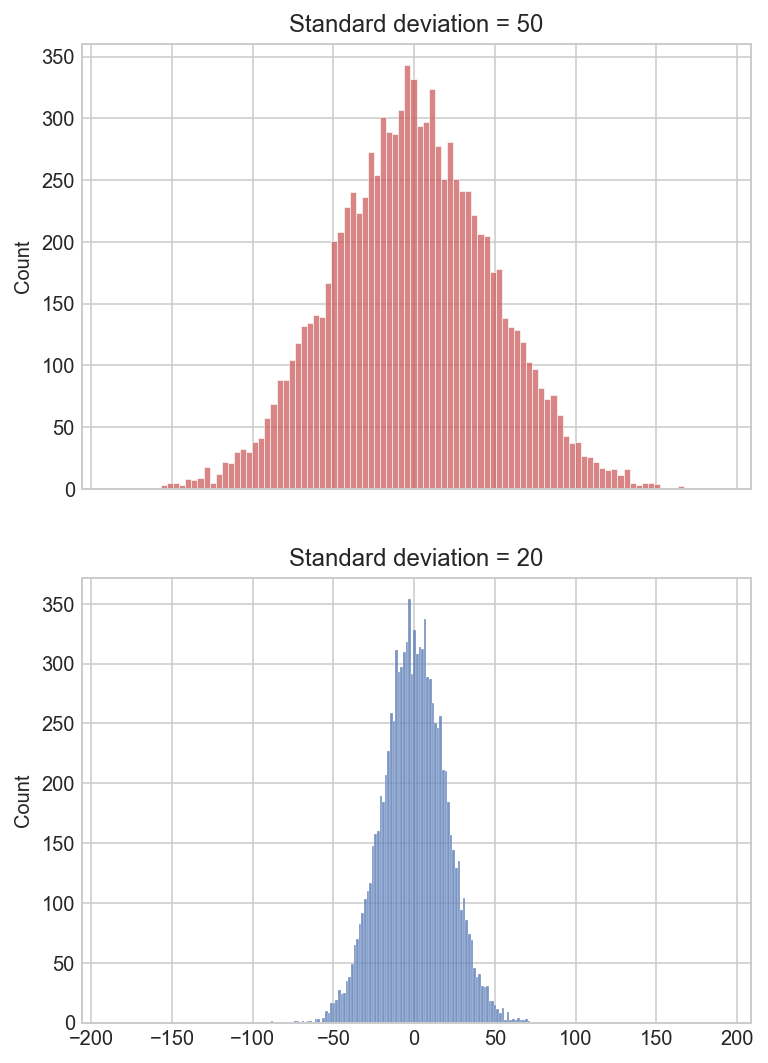

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,9))

std_1 = 50
sample_1 = np.random.normal(loc=0, scale=std_1, size=10000)
sns.histplot(sample_1, bins=100, ax=ax[0], stat='count', edgecolor='w', color='indianred')
ax[0].set_title(f'Standard deviation = {std_1}')

std_2 = 20
sample_2 = np.random.normal(loc=0, scale=std_2, size=10000)
sns.histplot(sample_2, bins=100, ax=ax[1], stat='count', edgecolor='w')
ax[1].set_title(f'Standard deviation = {std_2}')

plt.show()

## 1.3. Skewness
[Skewness](https://en.wikipedia.org/wiki/Skewness) is a measure of the asymmetry of a random variable about its mean. A skewness of $0$ indicates that the variable is symmetrically distributed. There are several approaches for calculating skewness (denoted $\gamma$); however, the Fisher's coefficient is the go-to one:

$$\gamma=\frac{m_3}{m_2^{3/2}}$$

where $\displaystyle{m_i=\frac{1}{n}\sum{(\mathbf{x}-\mu)^i}}$ is the $i$-th [central moment](https://en.wikipedia.org/wiki/Central_moment). In estimating the population skewness, we multiply the biased formula by the factor $\displaystyle{\frac{\sqrt{n(n-1)}}{n-2}}$ where $n$ is the sample size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

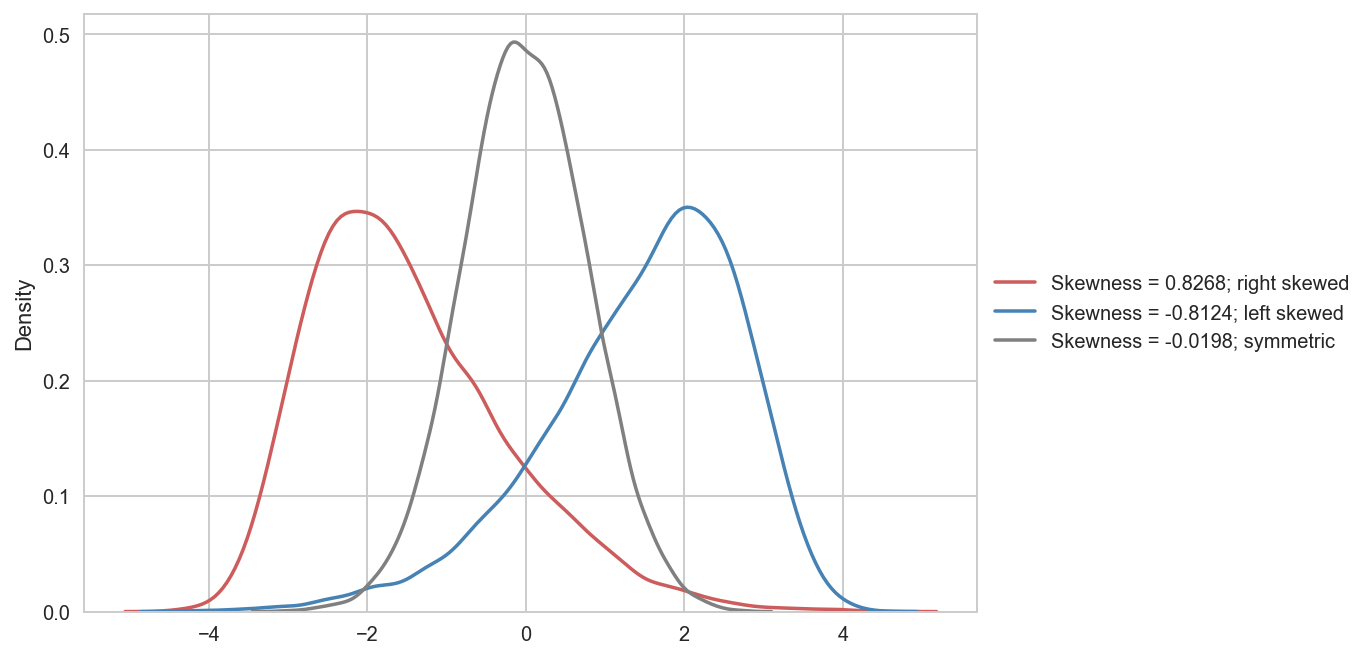

In [44]:
from scipy import stats
sample1 = stats.skewnorm(a=4, loc=-3, scale=2).rvs(size=10000, random_state=7)
sample2 = stats.skewnorm(a=-4, loc=3, scale=2).rvs(size=10000, random_state=7)
sample3 = stats.skewnorm(a=0, loc=0, scale=0.8).rvs(size=10000, random_state=7)

legend = [
    f'Skewness = {stats.skew(sample1):.4f}; right skewed',
    f'Skewness = {stats.skew(sample2):.4f}; left skewed',
    f'Skewness = {stats.skew(sample3):.4f}; symmetric'
]

fig, ax = plt.subplots()
sns.kdeplot(sample1, color='indianred', ax=ax)
sns.kdeplot(sample2, color='steelblue', ax=ax)
sns.kdeplot(sample3, color='grey', ax=ax)
ax.legend(legend, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

Note that the side of the skewness refers to the side of the longer tail. In the graph above, the red sample is said to be right skewed since the mass of its distribution is concentrated to the left, leading to a longer right tail.

In [11]:
from scipy.stats import skew
print(skew(sample1))
print(skew(sample2))

0.8267742492928277
-0.8123928593355433


## 1.4. Kurtosis
[Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) is a measure of peakedness of a distribution. The calculation of kurtosis (denoted $\kappa$) is given by Fisher's definition:

$$\kappa=\frac{m_4}{m_2^2}-3$$

where $m_i$ is the $i$-th [central moment](https://en.wikipedia.org/wiki/Central_moment) ($m_2$ is the variance). The quantity $3$ is subtracted from the result to give a skewness of $0$ for a normal distribution. When estimating the population kurtosis, we use the corrected formula:

$$\hat{\kappa}=\frac{n-1}{(n-2)(n-3)}\left[(n+1)\frac{m_4}{m_2^2}-3(n-1)\right]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

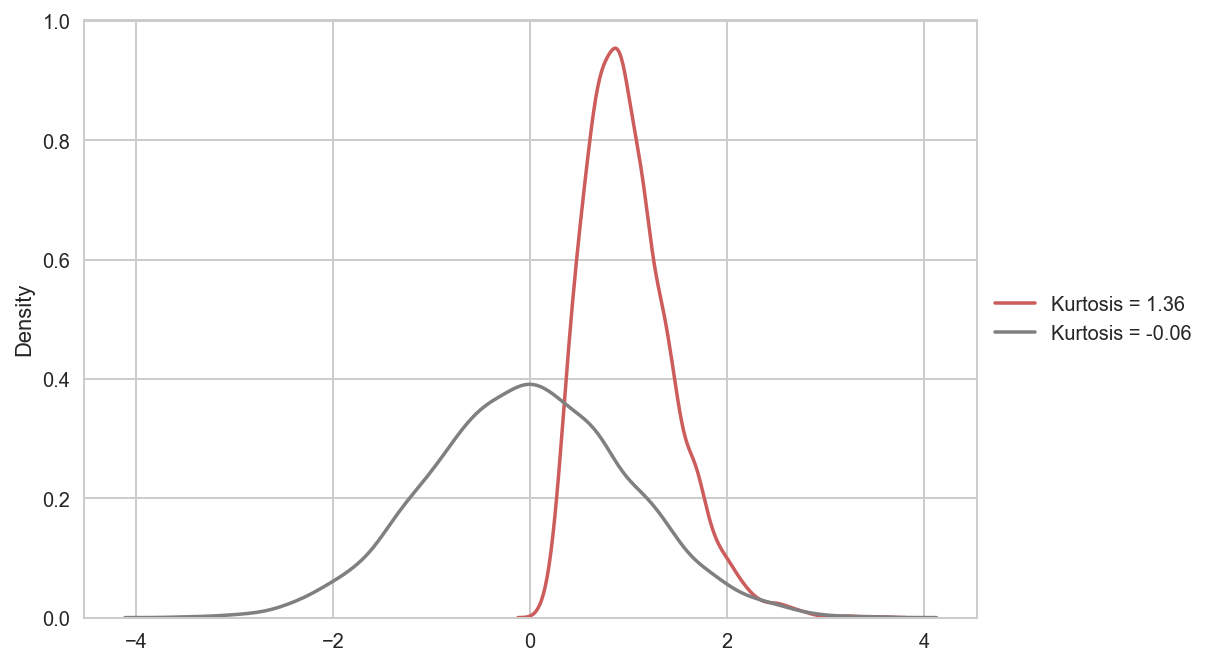

In [72]:
from scipy import stats
d1, d2 = 10, 1000
sample1 = stats.f(d1, d2).rvs(size=10000)
sample2 = stats.logistic(0,2).rvs(size=10000)
sample3 = stats.norm(0, 1).rvs(size=10000)

fig, ax = plt.subplots()
sns.kdeplot(sample1, color='indianred', ax=ax, label=f'Kurtosis = {stats.kurtosis(sample1):.2f}')
# sns.kdeplot(sample2, color='steelblue', ax=ax)
sns.kdeplot(sample3, color='gray', ax=ax, label=f'Kurtosis = {stats.kurtosis(sample3):.2f}')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

## 1.5. Quantiles
Quantiles are the $q-1$ cut points dividing a set of values into $q$ subsets of equal probability. Some common $q$-quantiles are median ($2$-quantile), quartiles ($4$-quantiles), deciles ($10$-quantiles) and percentiles ($100$-quantiles).

In [19]:
import numpy as np

In [20]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

#### Median
There are 50% of data points smaller the median and 50% of data point greater than the median.

In [21]:
np.median(sample)

599.0

#### Quartiles
$Q_1$, $Q_2$, $Q_3$ are the 3 quartiles that split our sample into 4 equal parts. There 25% of data points smaller than $Q_1$, 50% of the points smaller than $Q_2$ and 75% points smaller than $Q_3$. Notice that $Q_2$ is also known as the median.

In [22]:
np.quantile(sample, [0.25, 0.5, 0.75])

array([300.25, 599.  , 807.5 ])

In [23]:
# unpacking quartiles
q1, q2, q3 = np.quantile(sample, [0.25, 0.5, 0.75])

A box plot is used to visualize quartiles.

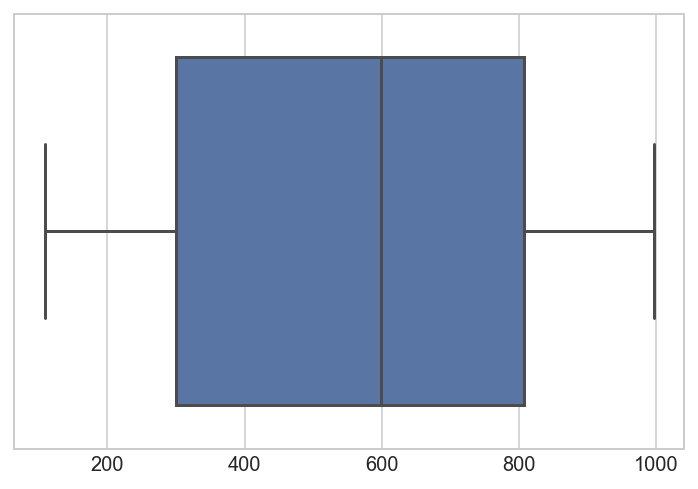

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
q1, q2, q3 = np.quantile(sample, [0.25, 0.5, 0.75])

sns.boxplot(x=sample)
plt.show()

#### Popular quantiles

In [25]:
np.quantile(sample, [0.05, 0.1, 0.2, 0.8, 0.9, 0.95])

array([156.8, 186.7, 269.4, 855. , 936. , 950.9])

## 1.6. Correlation coefficient

#### Covariance
First, we calculate the covariance (denoted $\sigma_{\mathbf{x},\mathbf{y}}$) of bivariate data, which is a measure of joint variability.

$$\sigma_{\mathbf{x},\mathbf{y}} =
\frac{1}{n} \sum_{i=1}^{n} {(x_i-\mu_\mathbf{x})\cdot (y_i-\mu_\mathbf{y})} =
E[(\mathbf{x}-E[\mathbf{x}])\cdot(\mathbf{y}-E[\mathbf{y}])]
$$

where $E[\mathbf{x}]$ or $E[\mathbf{y}]$ is the expected value of the corresponding variable.

The `numpy.cov` function returns the covariance matrix of $n$ variables: $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_n$.

In [26]:
import numpy as np

In [27]:
np.random.seed(0)
X = np.random.randint(10, 100, size=10)
Y = np.random.randint(10, 100, size=10)
Z = np.random.randint(10, 100, size=10)

In [28]:
np.cov([X, Y, Z])

array([[ 659.16666667, -128.16666667,   93.5       ],
       [-128.16666667,  664.76666667,  -57.1       ],
       [  93.5       ,  -57.1       ,  823.43333333]])

#### Correlation coefficient
Correlation coefficient (denoted $\rho_{\mathbf{x},\mathbf{y}}$) is the normalized version of covariance. By using Cauchy-Schwarz inequality, it's easy to proof that $\rho_{\mathbf{x},\mathbf{y}} \in [-1; 1]$. The closer the coefficient is to either -1 or 1, the stronger the correlation between the two variables.

$$\rho_{\mathbf{x},\mathbf{y}} = \frac{\sigma_{\mathbf{x},\mathbf{y}}}{\sigma_\mathbf{x} \sigma_\mathbf{y}}$$

The `numpy.corrcoef` function returns the correlation coefficient matrix of $n$ variables: $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_n$.

In [29]:
np.random.seed(0)
X = np.random.randint(10, 100, size=10)
Y = np.random.randint(10, 100, size=10)
Z = np.random.randint(10, 100, size=10)

In [30]:
np.corrcoef([X, Y, Z])

array([[ 1.        , -0.19361672,  0.12691115],
       [-0.19361672,  1.        , -0.07717689],
       [ 0.12691115, -0.07717689,  1.        ]])

## 1.7. Probability plots

Probability plots are used to compare distribution of 2 datasets. The possible scenarios involve comparing:
- Two empirical sets
- One empirical and one theoretical set
- Two theoretical set

The most common use probability plots is the middle one - when we compare observed data to data coming from a specified distribution.

In [31]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

#### P-P Plot

P-P Plot (probability-probability) is a visualization plots CDFs of two distribution against each other. If points are on the line ($x=y$) then 2 CDF are the same and observed values is under expected distribution. P-P plot is suitable for comparing probability distributions that have a nearby location because it requires the loc and scale parameters of theoretical distribution.

- In $x$ axis: Estimated cummulative proportions of empirical distribution, given $R_i$ is the rank of observed values

$$PE = \frac{R_i-1/2}{N}$$

- In $y$ axis: Expected cummulative probabilities of theoretical distribution (CDF corresponding to observed values)

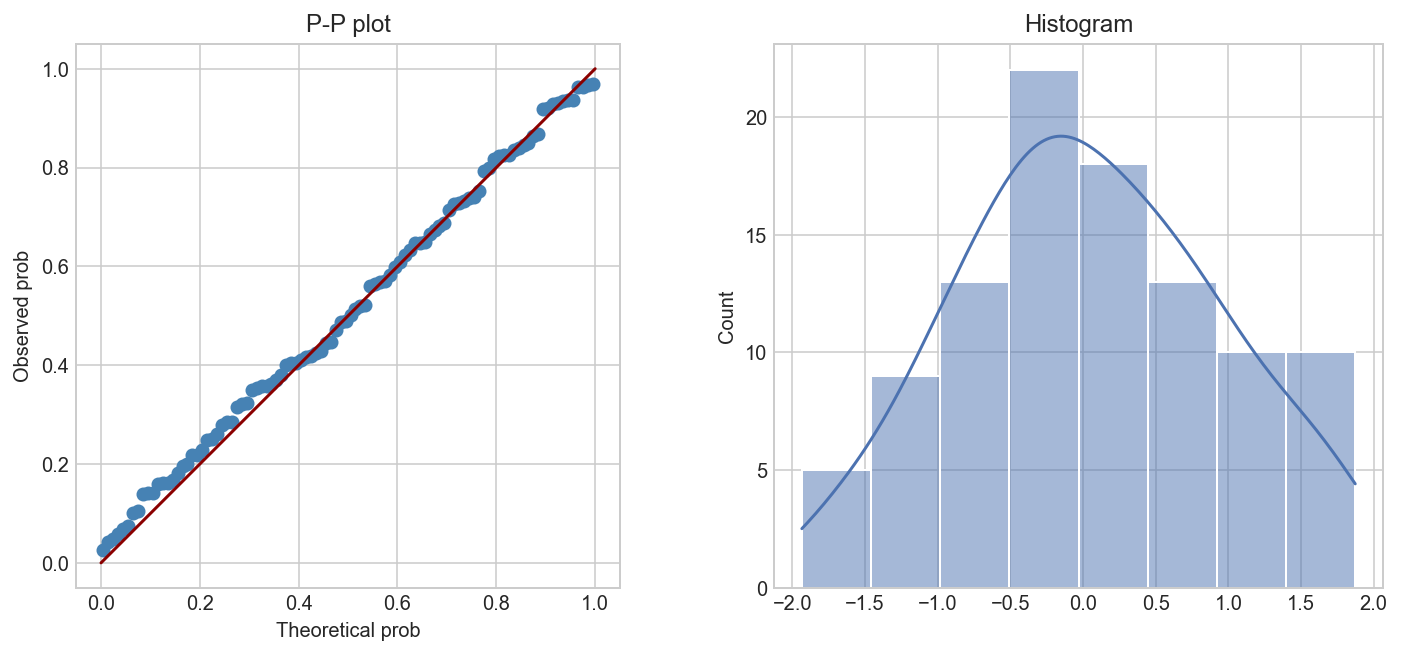

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
x = np.random.normal(size=100)
n = len(x)
pe = (np.arange(1, n+1)-0.5)/n
pp = np.sort(stats.norm(0,1).cdf(x))

# pp plot 
ax[0].plot(pe, pp, 'o', color='steelblue')
ax[0].plot(np.linspace(0,1), np.linspace(0,1), 'darkred')
ax[0].axis('scaled')
ax[0].set_title('P-P plot')
ax[0].set_xlabel('Theoretical prob')
ax[0].set_ylabel('Observed prob')

# histogram
ax[1] = sns.histplot(x, edgecolor='w', kde=True)
ax[1].set_title('Histogram')

plt.show()

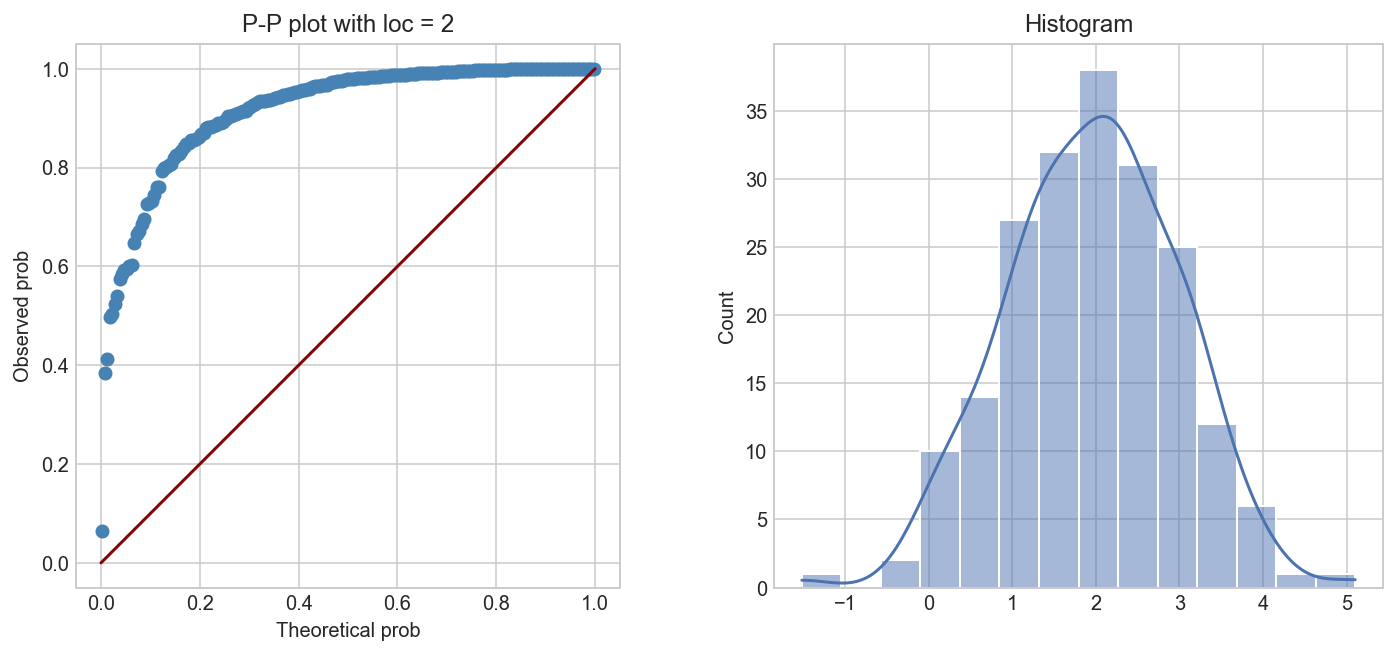

In [33]:
# change the loc parameter
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
x = np.random.normal(size=200, loc=2)
n = len(x)
pe = (np.arange(1, n+1)-0.5)/n
pp = np.sort(stats.norm(0,1).cdf(x))

# pp plot 
ax[0].plot(pe, pp, 'o', color='steelblue')
ax[0].plot(np.linspace(0,1), np.linspace(0,1), 'darkred')
ax[0].axis('scaled')
ax[0].set_title('P-P plot with loc = 2')
ax[0].set_xlabel('Theoretical prob')
ax[0].set_ylabel('Observed prob')

# histogram
ax[1] = sns.histplot(x, edgecolor='w', kde=True)
ax[1].set_title('Histogram')

plt.show()

#### Q-Q plot 

Similarity to P-P plot, Q-Q plot (quantile-quantile) is used to compare distribution by plotting their quantile agains each other. But Q-Q plot doesn't require loc and scale parameter and the reference line is based on location and scale of theoretical distribution. QQ plot is suitable for tails of distribution (when probabilty density is low)

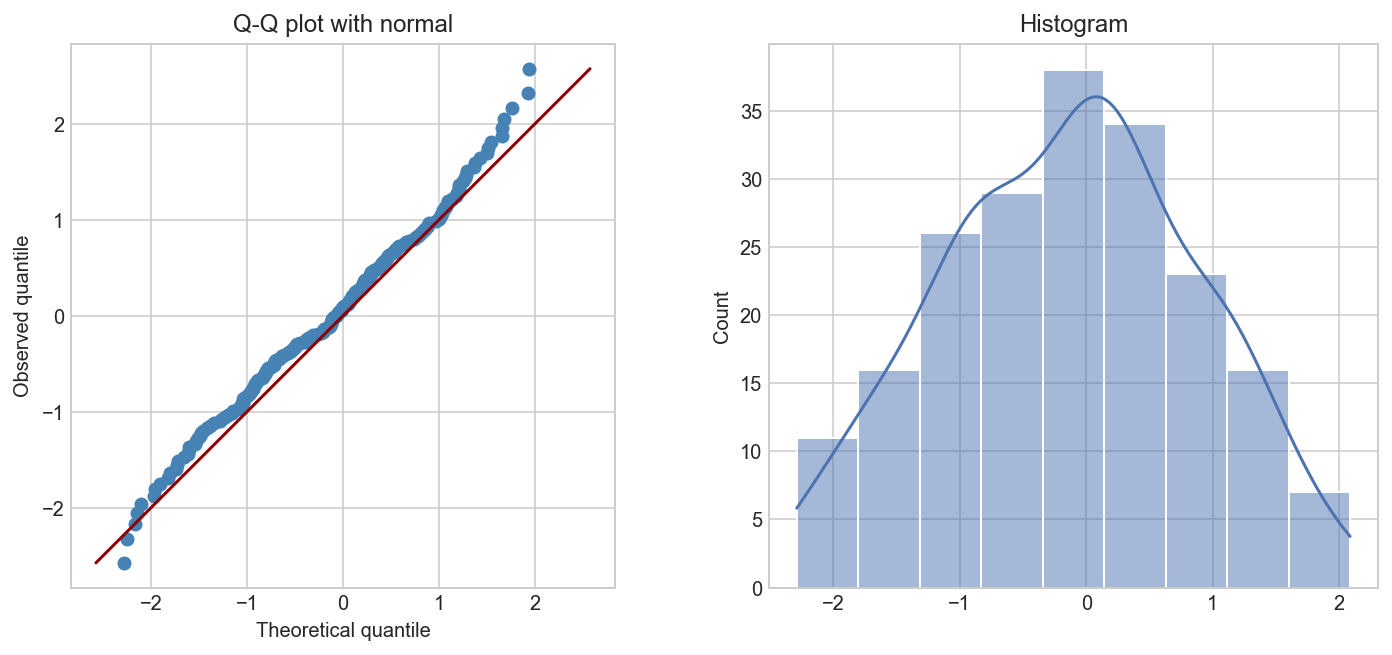

In [34]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
x = sorted(np.random.normal(size=200))
n = len(x)

quantiles_percent = np.linspace(0,1,n-1)
obs_quantile = np.quantile(x, q=quantiles_percent)
theore_quantile = [stats.norm.ppf(q) for q in quantiles_percent]
# qq plot
ax[0].plot(obs_quantile, theore_quantile, 'o', color='steelblue')
ax[0].plot(theore_quantile, theore_quantile, 'darkred')
ax[0].axis('scaled')
ax[0].set_title('Q-Q plot with normal')
ax[0].set_xlabel('Theoretical quantile')
ax[0].set_ylabel('Observed quantile')

#histogram
ax[1] = sns.histplot(x, kde=True, edgecolor='w')
ax[1].set_title('Histogram')

plt.show()

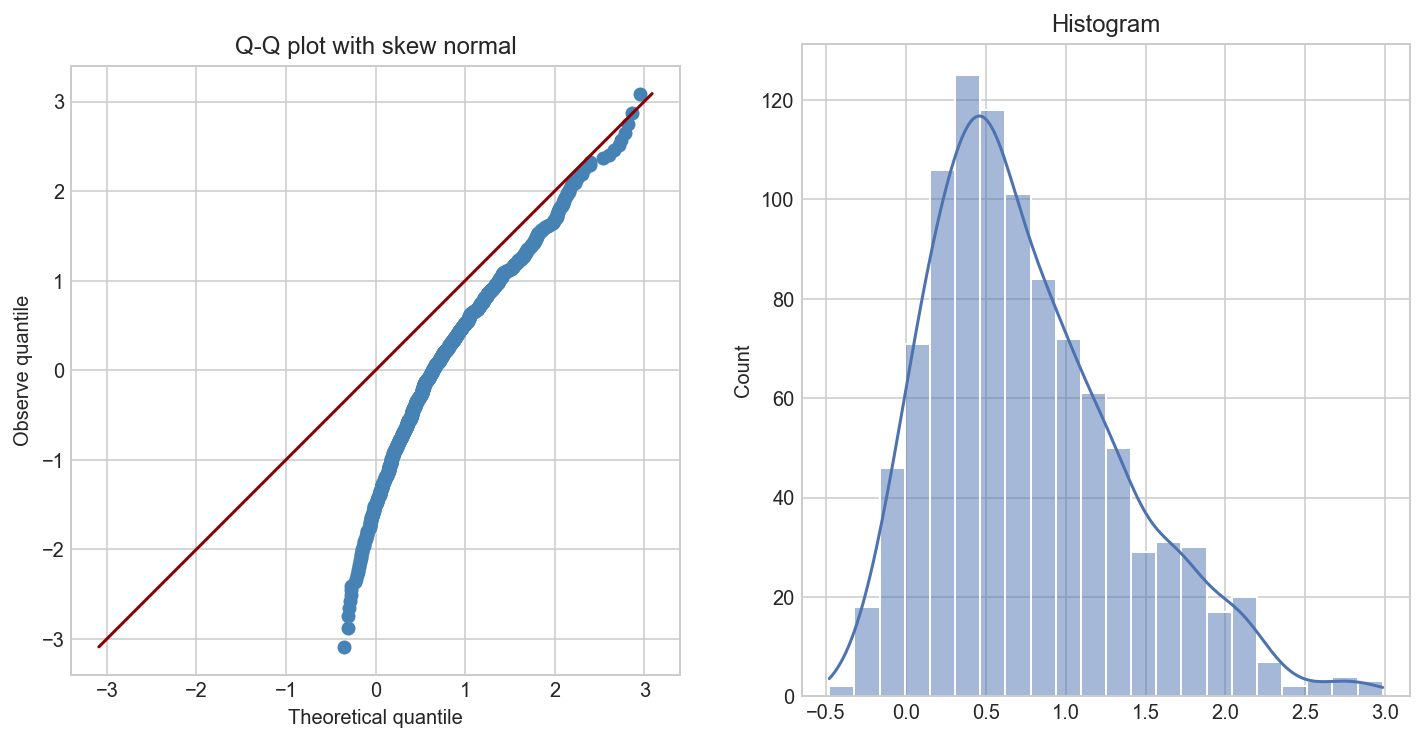

In [35]:
from scipy.stats import skewnorm

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
x = sorted(skewnorm.rvs(size=1000, a=5))
n = len(x)

quantiles_percent = np.linspace(0,1,n-1)
obs_quantile = np.quantile(x, q=quantiles_percent)
theore_quantile = [stats.norm.ppf(q) for q in quantiles_percent]
# qq plot
ax[0].plot(obs_quantile, theore_quantile, 'o', color='steelblue')
ax[0].plot(theore_quantile, theore_quantile, 'darkred')
ax[0].axis('scaled')
ax[0].set_title('Q-Q plot with skew normal')
ax[0].set_xlabel('Theoretical quantile')
ax[0].set_ylabel('Observe quantile')

#histogram
ax[1] = sns.histplot(x, edgecolor='w', kde=True)
ax[1].set_title('Histogram')

plt.show()

# 2. Statistical models

## 2.1. Regression with binary dependent variable
If we use linear function with probability is dependent variable, this will not restrict $P$ to lie between 0 and 1. Then we need to use a *nonlinear function* to model the conditional probability function of a binary dependent variable. Commonly used methods are Probit and Logit regression.

#### Logit model

Logistic model is used to describe the probability of a certain class such as true/false, good/bad,.... The difference between logistic and linear regression is the output of logistic is limited in $(0,1)$.

*Logistic function is the CDF of logistically distribution:*

$$P = \frac{1}{1+e^{-(\beta_0+\beta_1.x)}}$$ 

- $P$: probability of 1 class
- $\beta_0, \beta_1$,..: parameters

Logistic function can be rewritten to *logit function*:
$$ln(\frac{p}{1-p}) = \beta_0+\beta_1.x$$

where $\frac{p}{1-p}$ is `Odds ratio`

Logit model in statistic doesn't show the effect of independent variable $x$ on $y$, it considers the influence of $x$ on the probability to $y$ get the values 1 (expected value of $y$)

#### Probit model

In probit model, the *CDF of standard normal distribution* is used to model the regression:

$$P(Y=1\vert X) = \Phi(\beta_0 + \beta_1 X_1 + \dots + \beta_k X_k)$$

- $\Phi$: The CDF of standard normal distribution
- $\beta_0 + \beta_1 X + \dots + \beta_k X_k$: quantile $z^*$ where $\Phi(z^*) = P(Z \leq z^*) \ , \ Z \sim \mathcal{N}(0,1)$


The coefficient $\beta_j$ of probit model have the same meaning with logit model.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
import statsmodels.tools as sm
from statsmodels.discrete.discrete_model import Logit, Probit

In [37]:
df = pd.read_csv('data/logit_dataset.csv')
df.head()

,labor_join,chil5,chil618,age,wif_college,hus_college,log_wage,fam_income
0,1,1,0,32,0,0,1.210165,10.910001
1,1,0,2,30,0,0,0.328504,19.500000
2,1,1,3,35,0,0,1.514128,12.039999
3,1,0,3,34,0,0,0.092115,6.800000
4,1,1,2,31,1,0,1.524280,20.100000


In [38]:
y = df['labor_join']
x = df.drop(columns=['labor_join'])

In [39]:
x = sm.add_constant(x)
logit = Logit(y, x)

logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.601106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             labor_join   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.1209
Time:                        19:49:46   Log-Likelihood:                -452.63
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 8.923e-24
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1821      0.644      4.938      0.000       1.919       4.445
chil5          -1.4629      0.197     -7.426      0.000      -1.849      -1.077
chil618        -0.0646      0.068     -0.950      0.342      -0.198       0.069
age            -0.0629      0.013     -4.918      0.000      -0.088      -0.038
wif_college     0.8073      0.230      3.510      0.000       0.357       1.258
hus_college     0.1117      0.206      0.542      0.588      -0.292       0.516
log_wage        0.6047      0.151      4.009      0.000       0.309       0.900
fam_income     -0.0344      0.008     -4.196      0.000      -0.051      -0.018
===============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.601106
         Iterations 6


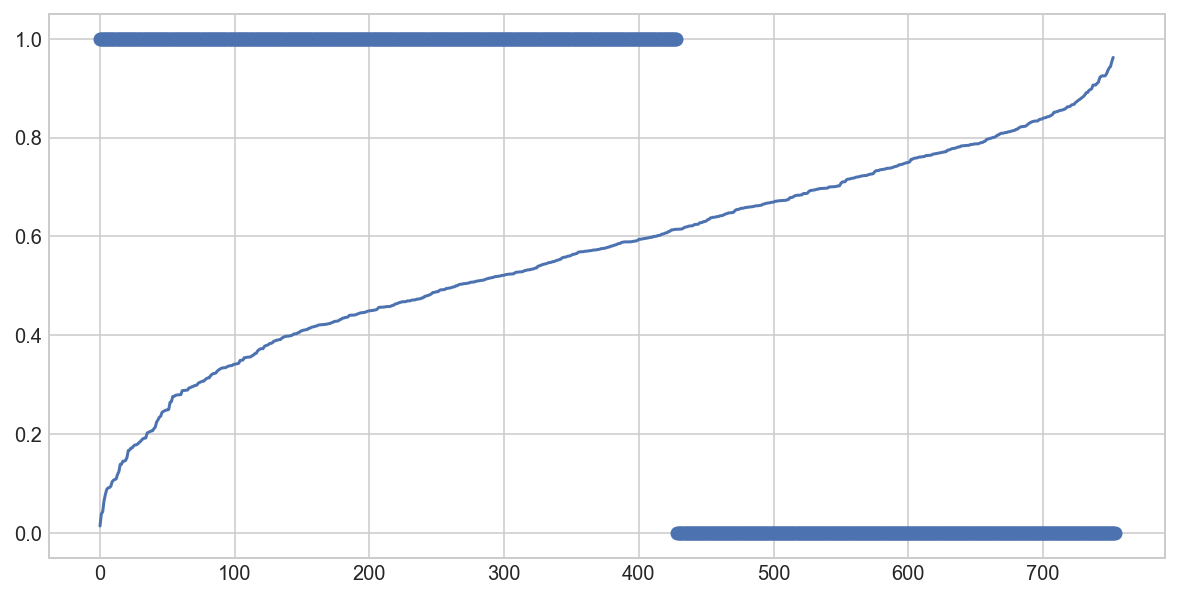

In [40]:
y_pred = logit.fit().predict(x)
plt.figure(figsize=(10,5))
plt.plot(sorted(y_pred))
plt.scatter(np.linspace(0,753,753),y)
plt.show()

In [41]:
probit = Probit(y, x)
probit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.601189
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:             labor_join   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.1208
Time:                        19:49:46   Log-Likelihood:                -452.69
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 9.471e-24
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9184      0.381      5.040      0.000       1.172       2.664
chil5          -0.8747      0.114     -7.703      0.000      -1.097      -0.652
chil618        -0.0386      0.040     -0.953      0.340      -0.118       0.041
age            -0.0378      0.008     -4.971      0.000      -0.053      -0.023
wif_college     0.4883      0.135      3.604      0.000       0.223       0.754
hus_college     0.0572      0.124      0.461      0.645      -0.186       0.300
log_wage        0.3656      0.088      4.165      0.000       0.194       0.538
fam_income     -0.0205      0.005     -4.297      0.000      -0.030      -0.011
===============================================================================
"""

In [42]:
probit.fit().predict(x)

Optimization terminated successfully.
         Current function value: 0.601189
         Iterations 5


0      0.520697
1      0.665092
2      0.464379
3      0.659372
4      0.665338
         ...   
748    0.755185
749    0.183754
750    0.660005
751    0.338742
752    0.522859
Length: 753, dtype: float64

## 2.5. Regression with panel data (reference)

Panel data is the combination of time-series and cross-section data. Panel data is required when we want to analyse the unobserved variables which effects to dependent variable. There are 2 models to analyse panel data: *fixed effects regression* and *random effects regression*

#### Fixed effects model (FEM)

Fix effects regression:

$$Y_{it} = \beta_0 + \beta_1 X_{it} + \beta_2 Z_i +  u_{it}$$

- $Y_{it}$: dependent variable
- $X_{it}$: independent variable
- $Z_i$: unobserved variable - which different between objects but unchange across the time. 

Set $\alpha_i = \beta_0 + \beta_2 Z_i$ 

=> $$Y_{it} = \beta_1 X_{1,it} + \cdots + \beta_k X_{k,it} + \alpha_i + u_{it}$$


#### Random effects model (REM)

Random effects model is a special case of fixed effects model. The function is the same as fixed effects model but the unobserved variable is difference.
$$Y_{it} = \beta_1 X_{1,it} + \cdots + \beta_k X_{k,it} + \alpha_i + u_{it}$$

With $\alpha_i$ is representative for the factors which unobserved and change between objects but unchange across the time.

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*